# <font style = "color:rgb(50,120,229)"> QR Code Detector </font>

## <font style = "color:rgb(50,120,229)"> Overview </font>

In the world where every other person carries an android phone or iPhone, QR Codes have gained a lot of popularity. The amount of information that these small and strange looking codes can carry is huge. Whether it's a URL, or a coupon code, or a person's PayTM account details, or a package's information, these codes can store it all. 

QR Code (Quick Response Code) were first designed in **1994** for automotive industry in Japan and since then they have left their mark in about every sector.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this project, we will implement a **QR Code Detector and Decoder** using **OpenCV** from scratch. We will then run our QR Code Detector on a sample image attached below.

![OpenCV ID Card](./IDCard-Satya.png)

## <font style = "color:rgb(50,120,229)">Additional Exercise </font>

1. Create your own **OpenCV ID Card** (unofficial). You can use the following template as reference.

![OpenCV ID Card Template](./IDCard-Template.png)

The QR Code should contain the following details:

```
Name: Your name will come here, ID: a random numeric string
```

Use the QR Code Detector to detect the QR Code on your ID card. Also try out different image processing techniques you have learnt so far in the course, for example, image blurring to blur the ID Card photo and see how it affects the performance of your QR Code Detector. Share your findings with other students on Discussion Forum.

2. Collect 5 photos of QR Codes that you have come across in your day-to-day life. Use our QR Code Detector to detect and decode the QR Code in the images. Don't forget to discuss your results and findings with other students in the discussion forum!

## <font style = "color:rgb(50,120,229)"> Outline </font>

Now that we have discussed about the aim of this project, let's see what are the main steps to be followed in this project.

1. Read image
2. Detect QR Code in the image
3. Draw bounding box around the detected QR Code
4. Print the decoded text
5. Save and display the result image

## <font style = "color:rgb(50,120,229)"> OpenCV Functions to Use </font>

First let's see what major OpenCV Functions you are going to use (or can use) in this project.

1. **Reading and writing image**: `cv2.imread()`, `cv2.imwrite()`
2. **Write text on image**: `cv2.putText()`
3. **Draw a line on image**: `cv2.line()`
4. **QR Detection**: `cv2.QRCodeDetector()`, `detectAndDecode()`

![Expected Result](./QRCode-Expected-Output.png)

# <font style = "color:rgb(50,120,229)"> Step 1: Read Image </font>

In [1]:
%matplotlib inline

# Import modules
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [3]:
# Image Path
imgPath = DATA_PATH+"images/IDCard-Satya.png"
#imgPath = "./IDCard-Rangel.png"

# Read image

###
### YOUR CODE HERE
###
img = cv2.imread(imgPath)

In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style = "color:rgb(50,120,229)"> Step 2: Detect QR Code in the Image </font>

In [5]:
# Create a QRCodeDetector Object
# Variable name should be qrDecoder

###
### YOUR CODE HERE
###

# Detect QR Code in the Image
# Output should be stored in
# opencvData, bbox, rectifiedImage
# in the same order

###
### YOUR CODE HERE
###
qrDecoder = cv2.QRCodeDetector()
opencvData, bbox, rectifiedImage = qrDecoder.detectAndDecode(img)
# Check if a QR Code has been detected
if opencvData != None:
    print("QR Code Detected")
else:
    print("QR Code NOT Detected")

QR Code Detected


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style = "color:rgb(50,120,229)"> Step 3: Draw bounding box around the detected QR Code </font>

In [8]:
# https://stackoverflow.com/questions/10016352/convert-numpy-array-to-tuple

n = len(bbox)

# Draw the bounding box
###
### YOUR CODE HERE
###
thickness = 2
lineType = cv2.LINE_AA
shift = 0

for i in range(n):
    start = tuple(bbox[i][0])
    if i == 3:
        stop = tuple(bbox[0][0])
    else:
        stop  = tuple(bbox[i+1][0]) 
    cv2.line(img, start, stop, (255, 0, 0), thickness, lineType, shift)

# <font style = "color:rgb(50,120,229)"> Step 4: Print the Decoded Text </font>

In [9]:
# Since we have already detected and decoded the QR Code
# using qrDecoder.detectAndDecode, we will directly
# use the decoded text we obtained at that step (opencvdata)
# https://www.w3schools.com/python/ref_string_split.asp
print(opencvData)
###
### YOUR CODE HERE
###
parts   = opencvData.split()
theName = parts[1].strip(',')
#theName = parts[1] + " " + parts[2].strip(',')
#theID   = parts[4]
theID = parts[3]
fontFace = cv2.FONT_HERSHEY_SIMPLEX;
fontThickness = thickness;
pixelHeight = 12;
thickness = 1;
fontScale   = cv2.getFontScaleFromHeight(fontFace, pixelHeight, thickness);
#print("fontScale = " + str(fontScale));
#print(theName)
#print(theID)
#cv2.putText(img, theName, (165, 125), fontFace, fontScale, (0, 0, 0), fontThickness, lineType);
#cv2.putText(img, theID, (210, 145), fontFace, fontScale, (0, 0, 0), fontThickness, lineType);

Name: Satya, ID: 1234


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style = "color:rgb(50,120,229)"> Step 5: Save and display the result image </font>

In [11]:
# Write the result image
resultImagePath = "QRCode-Output.png"
###
### YOUR CODE HERE
###
cv2.imwrite(resultImagePath, img)

True

In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


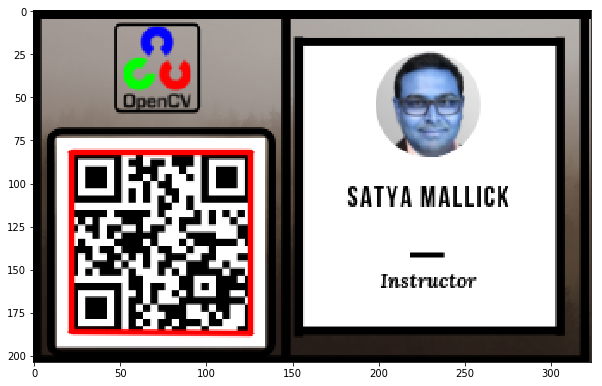

In [13]:
# Display the result image
plt.imshow(img)

# Notice anything wrong?

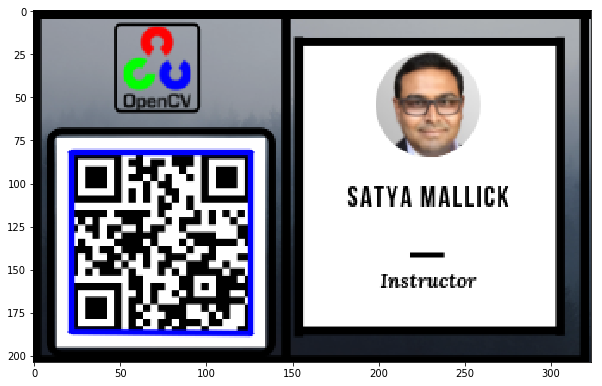

In [14]:
# OpenCV uses BGR whereas Matplotlib uses RGB format
# So convert the BGR image to RGB image
# And display the correct image

###
### YOUR CODE HERE
###
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)